In [246]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import title
from scipy.stats import linregress

In [247]:
from sqlite3 import Date
data = pd.read_csv("datasets/SeaLevelDataset.csv")

In [248]:
# Splitting dates and renaming columns
data = data.drop(["Unnamed: 2"], axis=1)
df = data['Date'].str.split("/", expand=True)
df['Sea Level Mean'] = data['Sea Level (Mean)'].apply(lambda x: float(x))
df.rename(columns={0: 'Year', 1: 'Month', 2: 'Day'}, inplace=True)
df.describe()

,Sea Level Mean
count,11035.000000
mean,1.188089
std,0.149659
min,0.570000
25%,1.095000
50%,1.173000
75%,1.265000
max,2.153000


In [249]:
#checking for nulls
df.isnull().sum()

Year              0
Month             0
Day               0
Sea Level Mean    0
dtype: int64

Text(0, 0.5, 'Average Sea Level')

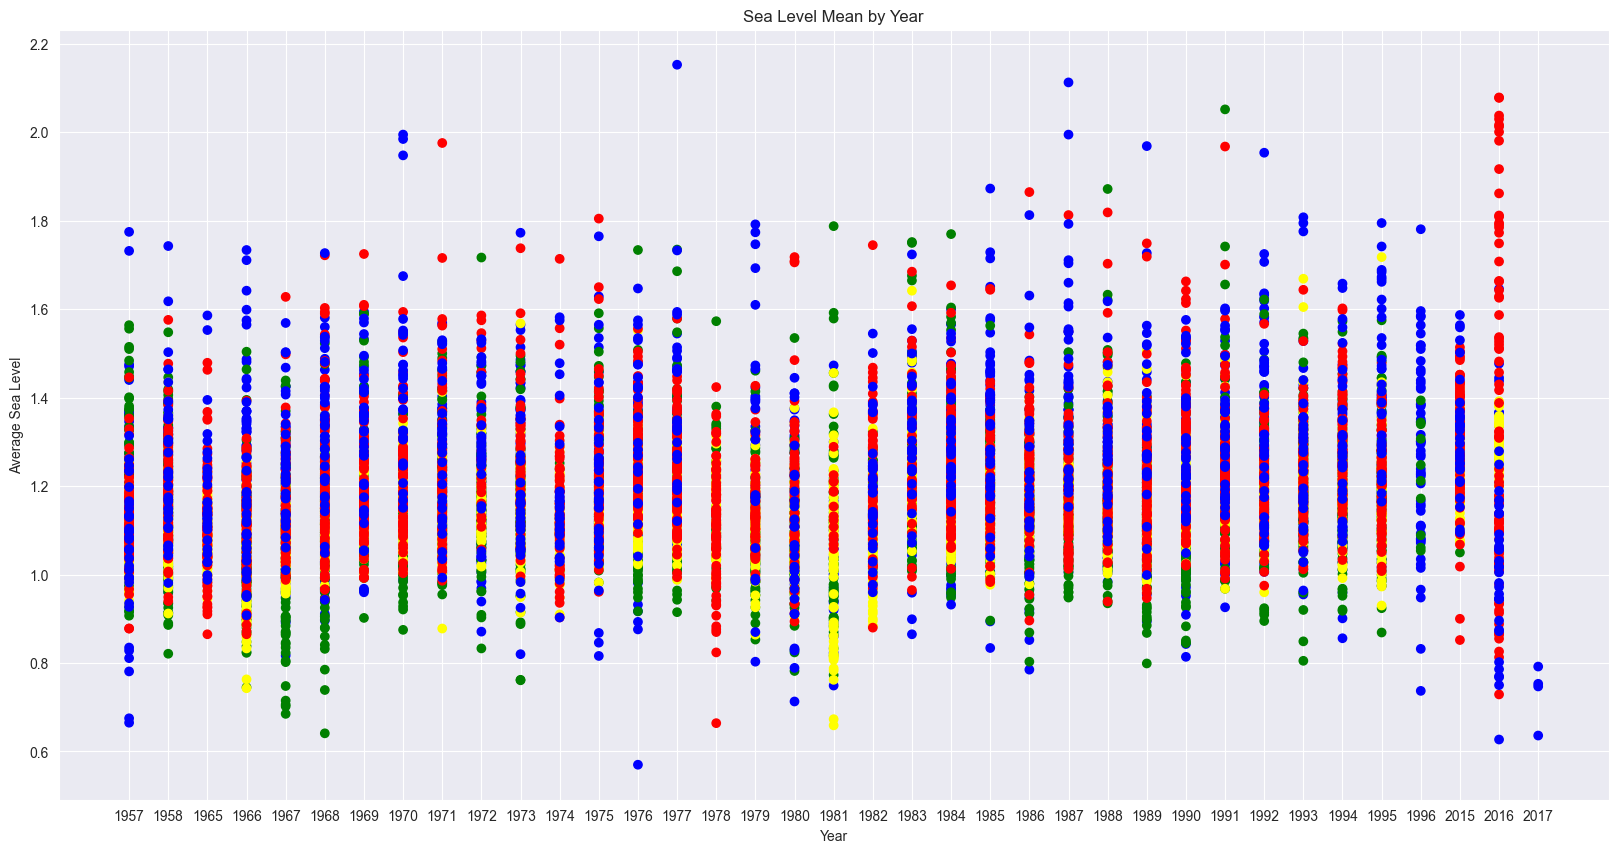

In [250]:
#visualizing dataset
df['Month'] = df['Month'].astype(int)
# Create a new column to assign colors to seasons:
# blue for winter (Dec-Jan-Feb)
# green for spring (Mar-Apr-May)
# yellow for summer (Jun-Jul-Aug)
# red for fall (Sep-Oct-Nov)
df['Color'] = df['Month'].apply(lambda x: 'blue' if x in [12, 1, 2] else ('yellow' if x in [6, 7, 8] else ('green' if x in [3, 4, 5] else ('red' if x in [9, 10, 11] else 'white'))))

x = df['Year']
y = df['Sea Level Mean']
colors = df['Color']
plt.figure(figsize=(20, 10))
plt.scatter(x,y, c =colors)
plt.title('Sea Level Mean by Year')
plt.xlabel('Year')
plt.ylabel('Average Sea Level')

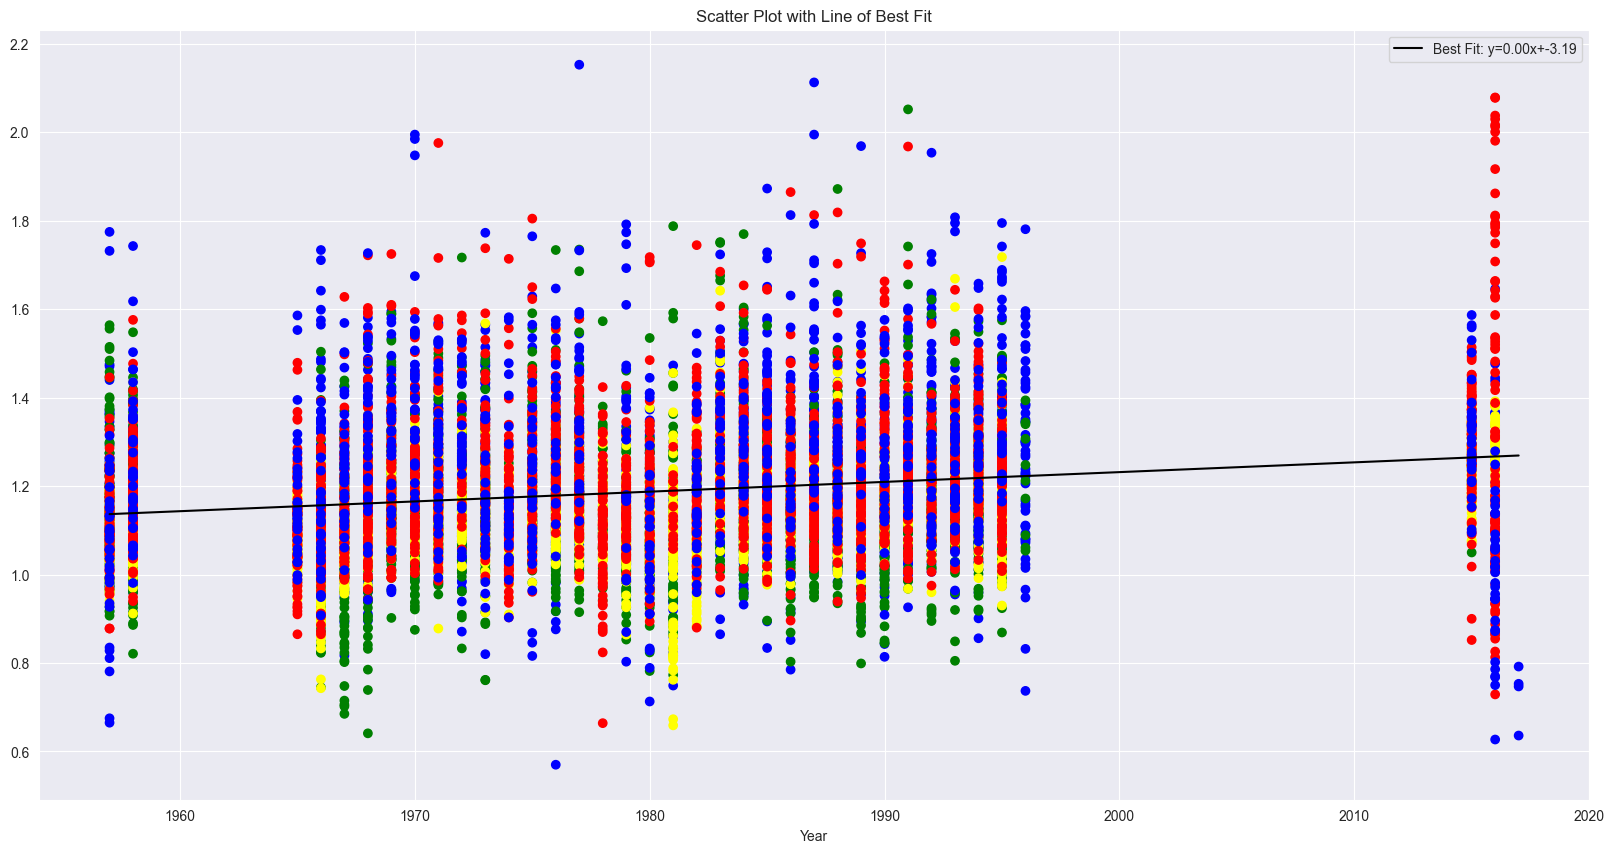

In [251]:
# Linear Regression
df['Year'] = df['Year'].astype(int)
x = df['Year']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
# Line of best fit
best_fit_line = slope * x + intercept
# Plot line of best fit
plt.figure(figsize=(20, 10))
plt.plot(x, best_fit_line, color='black', label=f'Best Fit: y={slope:.2f}x+{intercept:.2f}')
plt.scatter(x,y, c =colors)
plt.title('Sea Level Mean by Year')
plt.xlabel('Year')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.grid(True)

plt.show()


Text(0.5, 1.0, 'Sea Level Rise Prediction')

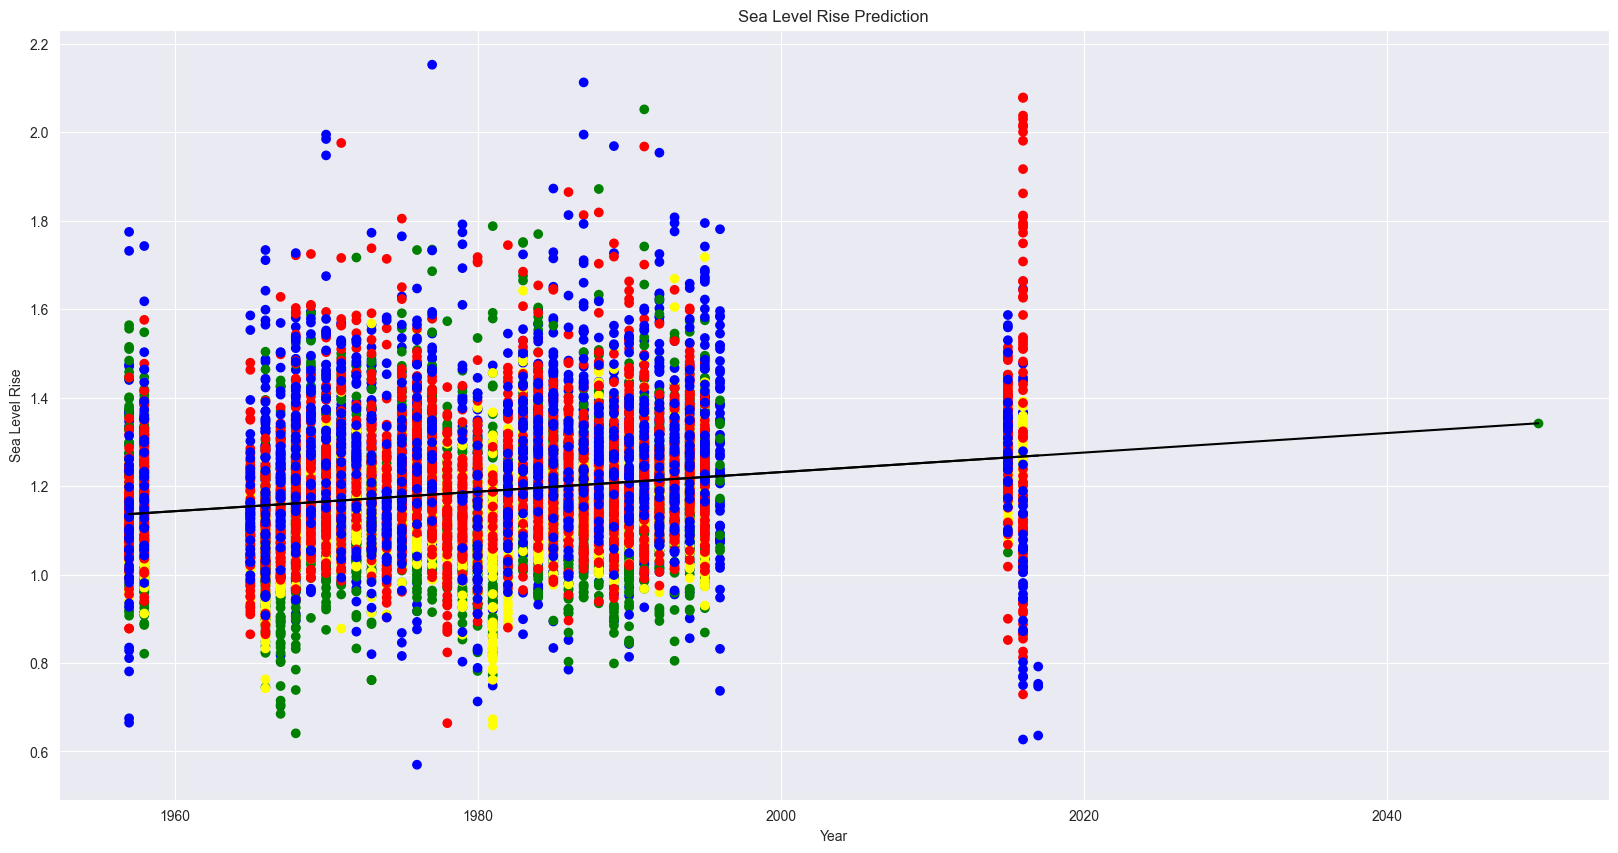

In [252]:
plt.figure(figsize=(20, 10))
plt.plot(x, best_fit_line, color='black', label=f'Best Fit: y={slope:.2f}x+{intercept:.2f}')
plt.scatter(x,y, c =colors)
plt.title('Sea Level Mean by Year')
plt.xlabel('Year')
plt.title('Scatter Plot with Line of Best Fit')

extended_years = np.append(x, 2050)
best_fit_line = slope * extended_years + intercept

sea_level_2050 = slope * 2050 + intercept

# Plot line of best fit for future predictions
plt.plot(extended_years, best_fit_line, color='black', label=f'Best Fit: y={slope:.2f}x+{intercept:.2f}')
plt.scatter(2050, sea_level_2050, color='green', label=f'Prediction for 2050: {sea_level_2050:.2f}m')

plt.xlabel('Year')
plt.ylabel('Sea Level Rise')
plt.title('Sea Level Rise Prediction')

In [254]:
df

,Year,Month,Day,Sea Level Mean,Color
0,1957,1,01,1,blue
1,1957,1,02,1,blue
2,1957,1,03,1,blue
3,1957,1,05,1,blue
4,1957,1,06,1,blue
...,...,...,...,...,...
11030,2016,12,31,0,blue
11031,2017,1,01,0,blue
11032,2017,1,02,0,blue
11033,2017,1,03,0,blue
